# Willkommen zu den TUCtagen 2020
---
## Mathematik als Schlüssel zur KI: Ziffernerkennung mittels Tensorflow

Wer das ganze selbst ausprobieren will, findet in dem Github-Verzeichnis 

https://github.com/janblechschmidt/TUC_Tage

dieses Notebook und eine Anleitung, wie ihr es starten und ausprobieren könnt.

---
Wir starten damit, eine bekannte Bibliothek im Bereich des maschinellen Lernens zu laden: Tensorflow.

In [1]:
import tensorflow as tf

Als nächstes laden wir uns den MNIST-Datensatz herunter.
Er besteht aus handschriftlichen Ziffern von 0 bis 9 und enthält 60.000 grauwertige Trainingsbilder der Größe 28x28, und zusätzlich 10.000 Testbilder.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Schauen wir uns einmal die Daten an:

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
y_train[3]

1

Versuchen wir mal, die Daten etwas schöner darzustellen.

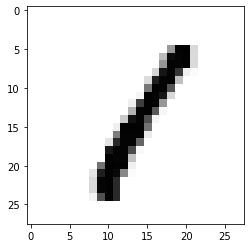

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3], cmap='Greys')

---
## Zielstellung

Unser Ziel ist es einen Algorithmus zu entwickeln der ein Bild der Größe 28 x 28 Pixel als Eingabe bekommt und diesem eine Ziffer von 0 bis 9 zuweist.

**Datenbereich**: $\{ 0, 1, \ldots, 255 \}^{28 \times 28}$

**Wertebereich**: $\{0, 1, \ldots , 9\}$

Mathematisch gesprochen suchen wir eine Funktion, die die Abbildung

$$ 
f : \text{Bild} \mapsto \text{Ziffer}
$$

realisiert, also

$$
f : \{0, 1, \ldots, 255\}^{28 \times 28} \to \{0, 1, \ldots , 9\}.
$$

## Wie sieht die Funktion $f$ aus?

Neuronale Netze versuchen in vielen Fällen nichts anderes, als komplexe Zusammenhänge zu approximieren.
Es besteht aus mehreren Schichten, auch *layers* genannt, die über eine Verkettung bzw. Hintereinanderausführung miteinander verbunden sind.

### Schematische Darstellung eines Neuronalen Netzes
![Einfaches Feedforward Neural Net](./pictures/FNN.png)

Dabei ist jede Schicht mit jeweils ihrer nächsten Schicht vollständig verbunden. Jede Abbildung zwischen zwei Schichten\Layers besteht dabei aus zwei Schritten:
1. *Propagation*: Um die Werte der *Neuronen* in der ersten Schicht zu berechnen rechnet man

$$
	(W^{(1)})^\top x^{(0)} + b^{(1)}
	= 
	\begin{bmatrix}
		w_{1,1}^{(1)}
		&
		w_{2,1}^{(1)}
		&
		w_{3,1}^{(1)}
		\\
		w_{1,2}^{(1)}
		&
		w_{2,2}^{(1)}
		&
		w_{3,2}^{(1)}
		\\
		w_{1,3}^{(1)}
		&
		w_{2,3}^{(1)}
		&
		w_{3,3}^{(1)}
		\\
		w_{1,4}^{(1)}
		&
		w_{2,4}^{(1)}
		&
		w_{3,4}^{(1)}
		\\
	\end{bmatrix}
	\begin{pmatrix}
		x^{(0)}_1
		\\
		x^{(0)}_2
		\\
		x^{(0)}_3
	\end{pmatrix}
	+
	\begin{pmatrix}
		b^{(1)}_1
		\\
		b^{(1)}_2
		\\
		b^{(1)}_3
		\\
		b^{(1)}_4
	\end{pmatrix}
    =: 
	\begin{pmatrix}
		z^{(1)}_1
		\\
		z^{(1)}_2
		\\
		z^{(1)}_3
		\\
		z^{(1)}_4
	\end{pmatrix}  
$$

2. *Activation*: Anschließend wenden wir eine nichtlineare Aktivierungsfunktion $\sigma^{(1)}$ auf jedes $z^{(1)}_j$ an und erhalten so $x^{(1)}_j$, d.h.

$$
	\begin{pmatrix}
		x^{(1)}_1
		\\
		x^{(1)}_2
		\\
		x^{(1)}_3
		\\
		x^{(1)}_4
	\end{pmatrix}
    = 
    	\begin{pmatrix}
		\sigma^{(1)}(z^{(1)}_1)
		\\
		\sigma^{(1)}(z^{(1)}_2)
		\\
		\sigma^{(1)}(z^{(1)}_3)
		\\
		\sigma^{(1)}(z^{(1)}_4)
	\end{pmatrix}  
$$

---
**Der Kern des Trainings eines neuronalen Netzes besteht darin, die unbekannten Parameter $w_{i,j}$ und $b_j$ möglichst gut zu bestimmen**

Bekanntestes Beispiel einer Aktivierungsfunktion ist die sogenannte ReLU-Funktion (für Rectified Linear Unit)

$$
\sigma(z) = \max \{ 0 , z \}.
$$

## Wie sieht diese Funktion aus?

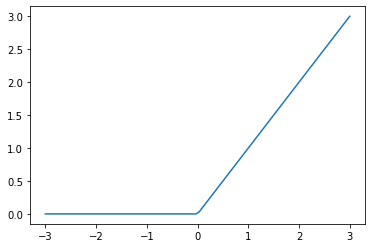

In [14]:
import numpy as np

def relu(z):
    return np.maximum(0, z)

z = np.linspace(-3, 3, 100)
plt.plot(z, relu(z))

---
## Definition eines Models

Zuerst laden wir einige Funktionen...

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

... und initialisieren unser Modell.

In [16]:
model = Sequential()

Als erstes ziehen wir der Einfachheit halber die Bilder, die eigentlich zweidimensional sind, in die Länge.
Obwohl wir hierbei wichtige Nachbarschaftsinformationen zwischen Pixeln wegwerfen reicht es immer noch aus, um ein anständigen Klassifizierer zu trainieren.

**Hinweis**: Wie das ganze mit richtigen Farbbildern geht, lernt Ihr im Kurs *Optimierung im Maschinellen Lernen*.

**Beispiel**:

$$
\text{Flatten} 
\begin{pmatrix} 1 & 2 \\
3 & 4
\end{pmatrix}
=
\begin{pmatrix} 1 \\ 2 \\ 3 \\ 4 \end{pmatrix}
$$

In [17]:
model.add(Flatten(input_shape=(28,28)))

Die Dimension unseres Inputlayers ist also $28 \times 28 = 784$.

Als nächstes fügen wir ein *hidden layer* mit 128 Neuronen ein.
Dem Beispiel von oben folgend ergibt das
$784 \times 128 + 128 = 100.480$ 
Unbekannte.

*Hinweis*: Das können wir auch mit der Funktion `model.count_params()` herausfinden. 

In [18]:
model.add(Dense(128, activation = 'relu'))

In [ ]:
model.add(Dense(32, activation = 'relu'))

Unser *output layer* ist 10-dimensional, da wir uns hier für die übliche 0-1-Kodierung entscheiden, die häufig in der Klassifizierung verwendet wird.

Dabei wird eine Ziffer von 0 bis 9 durch einen Vektor der Länge 10 darstellt, welcher genau an einer Stelle eine Eins und sonst Nullen enthält, also

$$
'0' = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix},
\quad
'1' = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix},
\quad
'2' = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix}
\quad \cdots \quad
'9' = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}.
$$

In [19]:
model.add(Dense(10))

Jetzt kommen also nochmal
$128 \times 10 + 10 = 1290$
unbekannte Parameter dazu.

In [20]:
print('Zusammen ergibt das {} unbekannte Parameter.'.format(model.count_params()))

Zusammen ergibt das 101770 unbekannte Parameter.


Jetzt haben wir ein einfaches Modell für unsere Funktion $f$ definiert.

---
## Grundidee maschinellen Lernens

1. Wir starten damit, die 101.770 unbekannten Parameter zufällig zu wählen.
2. Anschließend zeigen wir unserem Neuronalen Netz einzeln oder häppchenweise die Bilder aus unserem Trainingsdatensatz `x_train`, lassen das Modell die Ziffer vorhersagen und vergleichen diese Vorhersage mit der tatsächlichen Ziffer.
3. Abhängig davon, passen wir die Gewichte systematisch an, um beim nächsten mal eine bessere Klassifikation zu erreichen, also mehr Ziffern richtig zu erkennen.

### Training des Modells

Bevor wir mit dem Training starten können, benötigen wir noch eine *Loss function*.
Eine solche Funktion ist in der Regel ein Maß dafür, wie nah unsere aktuelle Modellvorhersage am tatsächlichen Wert liegt.
Damit sagt sie unserem Algorithmus, ob er gut oder schlecht klassifiziert hat.

Ohne näher darauf einzugehen, verwenden wir die folgende *Loss function*.

In [21]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Jetzt fügen wir alles zusammen.

In [22]:
model.compile(optimizer='adam',
              loss=loss_func,
              metrics=['accuracy'])

### Wie das alles im Detail funktioniert, lernt Ihr bei uns im Mathematik- und Data Science Studium!

Anschließend können wir unser Modell mit den Trainingsdaten trainieren (**Jetzt wird tatsächlich gerechnet, und zwar viel!**).

In [23]:
model.fit(x_train, y_train, batch_size = 100, epochs = 3)

Epoch 1/3
600/600 [==============================] - 11s 18ms/step - loss: 4.1272 - accuracy: 0.8679
Epoch 2/3
600/600 [==============================] - 11s 18ms/step - loss: 0.5499 - accuracy: 0.9115
Epoch 3/3
600/600 [==============================] - 14s 23ms/step - loss: 0.3063 - accuracy: 0.9320


Wie man an dem Wert `accuracy` ablesen kann, klassifiziert unser Modell in mehr als 90 % der Fälle die Ziffer korrekt.

Schauen wir mal, wie sich das Modell bei Daten schlägt, mit denen es nicht trainiert wurde:

In [24]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.4267 - accuracy: 0.9251


[0.4266955554485321, 0.9251000285148621]

Auch hier erreichen wir eine korrekte Klassifizierung in über 90 % der Fälle.

Am Ende dieses Teils wollen wir uns noch kurz ein paar Beispiele für Ziffern anschauen, die falsch klassifiziert wurden.
Wir können diese mit den folgenden Code-Zeilen rausfinden:

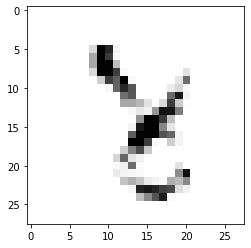

Das Modell sagt 2 voraus.
In Wahrheit ist es eine 8.


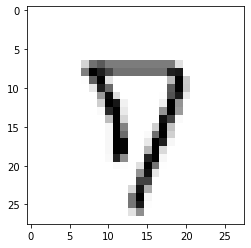

Das Modell sagt 9 voraus.
In Wahrheit ist es eine 7.


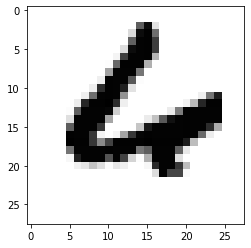

Das Modell sagt 4 voraus.
In Wahrheit ist es eine 6.


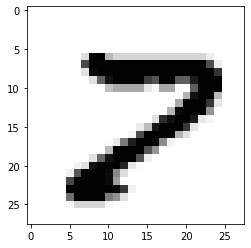

Das Modell sagt 8 voraus.
In Wahrheit ist es eine 7.


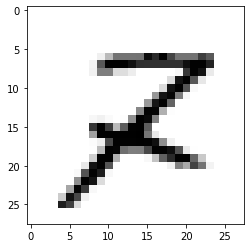

Das Modell sagt 8 voraus.
In Wahrheit ist es eine 7.


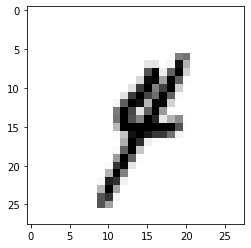

Das Modell sagt 3 voraus.
In Wahrheit ist es eine 4.


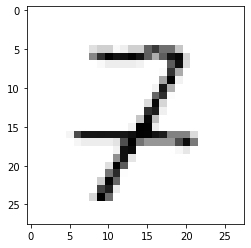

Das Modell sagt 2 voraus.
In Wahrheit ist es eine 7.


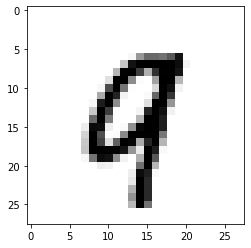

Das Modell sagt 3 voraus.
In Wahrheit ist es eine 9.


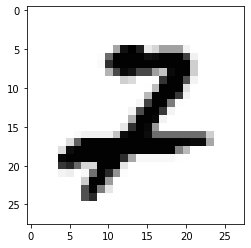

Das Modell sagt 2 voraus.
In Wahrheit ist es eine 7.


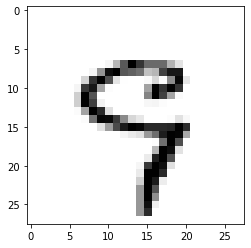

Das Modell sagt 7 voraus.
In Wahrheit ist es eine 9.


In [28]:
import numpy as np

wrong_index = np.where(np.argmax(model.predict(x_test), axis=1) != y_test)[0]

for j in np.random.randint(0,len(wrong_index),10):
    i = wrong_index[j]
    y_i = y_test[i]
    y_model = np.argmax(model.predict(x_test[i:i+1]))
    plt.imshow(x_test[i], cmap = 'Greys')
    plt.pause(0.01)
    print('Das Modell sagt {} voraus.'.format(y_model))
    print('In Wahrheit ist es eine {}.'.format(y_i))


## Warum ist Mathematik der beste Einstieg in die Welt der KI?

Auch wenn hier hauptsächlich Programmieren zu erkennen war, fußt das maschinellen Lernen auf mathematischen Verfahren, zu deren Weiterentwicklung und solider Anwendung eine fundierte Mathematikausbildung notwendig ist.

### Im Bachelorstudium Mathematik lernt ihr 

- mathematischen Grundlagen kennen, die auch im maschinellen Lernen von besonderer Bedeutung sind (Lineare Algebra, Numerik, Optimierung, Stochastik)
- die Umsetzung mathematischer Verfahren in modernen Programmiersprachen
- eine mathematische Herangehensweise an Probleme

### Im anschließenden Masterstudium Data Science lernt ihr

- wie, und vor allem warum, die eben vorgestellten Algorithmen funktionieren
- wir ihr Algorithmen des maschinellen Lernens, z.B. neuronale Netze,  selbst implementiert, auch ohne Bibliotheken wie Tensorflow (Google) oder PyTorch (Facebook)
- weitere Anwendungen in den Bereichen Regression, Klassifizierung und Reinforcement Learning kennen